In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Latex
from sympy import * 
from iminuit import Minuit
import seaborn as sns
import pandas as pd
import scipy as sp
import sys                                             # Modules to see files and folders in directories
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure
from scipy.stats import binom, poisson, norm

In [3]:

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

In [4]:
L,g,T ,C= symbols("L, g, T,C")
dL,dg,dT= symbols("sigma_L, sigma_g, sigma_T")

In [5]:
g=L*(2*pi/T)**2
dg=sqrt((dL*g.diff(L))**2+(g.diff(T)*dT)**2)
lprint(latex(Eq(symbols('sigma_dg'), dg)))

<IPython.core.display.Latex object>

In [6]:
A=np.loadtxt("Heyo2.dat")
 

In [7]:
A[:,1]=A[:,1]-min(A[:,1])
A=A[1:len(A[:,1]),:]


In [8]:
np.polyfit(A[:,0],A[:,1],1)

array([1.38375633, 2.61988288])

In [9]:
Residual_Time=A[:,1]/A[:,0]-np.mean(A[:,1]/A[:,0])
Data={"Time":A[:,1],"Number":A[:,0],"Residual_Time":Residual_Time}
Data1_pend=pd.DataFrame(Data)

In [14]:
def fit_function_Lin(x, slope, intercept ):
    return intercept + slope*x
    
chi2_object = Chi2Regression(fit_function_Lin, Data1_pend.Number,Data1_pend.Time, Data1_pend.Time.std()) 
minuitLin = Minuit(chi2_object, pedantic=False, intercept=1, slope=1, print_level=0) 
minuitLin.migrad(); 
Chi2Lin = minuitLin.fval
NdofLin = len(A[:,0])- 2  # Number of degrees of freedom
    
#from scipy import stats
ProbLin =  sp.stats.chi2.sf(Chi2Lin, NdofLin) # The chi2 probability given N_DOF degrees of freedom
    
array_Chi2_Lin= Chi2Lin
array_Prob_Lin= ProbLin

In [15]:
tau  = np.zeros(len(Data1_pend.Residual_Time))
ullh = np.zeros(len(Data1_pend.Residual_Time))
ullh_minval = 999999.9
ullh_minpos = 0.0
Ntau_steps = 50
min_tau = 0.5
max_tau = 1.5
delta_tau = (max_tau-min_tau) / Ntau_steps
t=Data1_pend.Number
verbose = True

In [16]:
print(*minuitLin.args)

1.3837563348413153 2.619882880835924


NameError: name 'figLin' is not defined

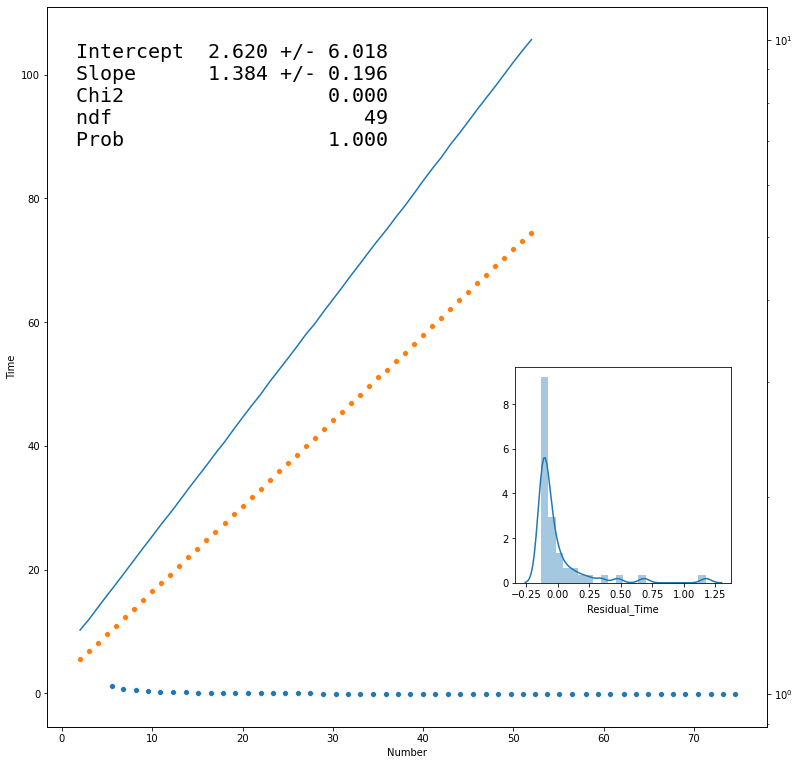

In [17]:
Residual_Time=A[:,1]/A[:,0]-np.mean(A[:,1]/A[:,0])
#3with sns.axes_style("whitegrid"):

fig=plt.figure(figsize=(10,10))
ax=fig.add_axes([0,0,1,1])
ax1=fig.add_axes([0.65,0.2,0.3,0.3])
ax2 = ax.twinx()
sns.scatterplot(x=Data1_pend.Time,y=Data1_pend.Residual_Time,ax=ax)
sns.scatterplot(x=Data1_pend.Number,y=Data1_pend.Time,ax=ax)

sns.lineplot(x=Data1_pend.Number, y=fit_function_Lin(Data1_pend.Time, *minuitLin.args),ax=ax)
#sns.distplot(func_gaussian(Data1_pend.Time, *minuit_gaussian.args),ax=ax1)
sns.distplot(Data1_pend.Residual_Time,ax=ax1)

d = {'Intercept':[minuitLin.values['intercept'], minuitLin.errors['intercept']],
     'Slope':    [minuitLin.values['slope'], minuitLin.errors['slope']],
     'Chi2':     Chi2Lin,
     'ndf':      NdofLin,
     'Prob':     ProbLin,
    }
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.04, 0.95, text, ax, fontsize=20)


ax2.set_yscale('log')
figLin.tight_layout()

In [18]:
# Now loop of POSSIBLE tau estimates:
for itau in range(len(Data1_pend.Residual_Time)):
    tau_hypo = min_tau + itau*delta_tau         # Scan in values of tau
    tau[itau] = tau_hypo


    nobs = Data1_pend.Residual_Time

    # Calculate Unbinned likelihood (from loop over events):
    ullh[itau] = 0.0
    for time in t :     # i.e. for every data point generated...
        ullh[itau] += -2.0*np.log(1.0/tau_hypo*np.exp(-time/tau_hypo))   # Unbinned LLH function
    
    if (verbose) :
        print(f" {itau:3d}:log(ullh) = {ullh[itau]:6.2f}")

    if (ullh[itau] < ullh_minval) :
        ullh_minval = ullh[itau]
        ullh_minpos = tau_hypo

   0:log(ullh) = 5437.30
   1:log(ullh) = 5229.45
   2:log(ullh) = 5037.15
   3:log(ullh) = 4858.72
   4:log(ullh) = 4692.71
   5:log(ullh) = 4537.90
   6:log(ullh) = 4393.18
   7:log(ullh) = 4257.60
   8:log(ullh) = 4130.34
   9:log(ullh) = 4010.66
  10:log(ullh) = 3897.90
  11:log(ullh) = 3791.49
  12:log(ullh) = 3690.91
  13:log(ullh) = 3595.69
  14:log(ullh) = 3505.43
  15:log(ullh) = 3419.74
  16:log(ullh) = 3338.29
  17:log(ullh) = 3260.79
  18:log(ullh) = 3186.94
  19:log(ullh) = 3116.51
  20:log(ullh) = 3049.25
  21:log(ullh) = 2984.97
  22:log(ullh) = 2923.48
  23:log(ullh) = 2864.59
  24:log(ullh) = 2808.14
  25:log(ullh) = 2754.00
  26:log(ullh) = 2702.02
  27:log(ullh) = 2652.08
  28:log(ullh) = 2604.06
  29:log(ullh) = 2557.85
  30:log(ullh) = 2513.36
  31:log(ullh) = 2470.49
  32:log(ullh) = 2429.15
  33:log(ullh) = 2389.28
  34:log(ullh) = 2350.78
  35:log(ullh) = 2313.60
  36:log(ullh) = 2277.66
  37:log(ullh) = 2242.91
  38:log(ullh) = 2209.29
  39:log(ullh) = 2176.74


In [19]:

chi2_gaussian = Chi2Regression(func_gaussian, G1[0],G1[1][0:len(G1[1])-1], G1[1][0:len(G1[1])-1].std())
minuit_gaussian = Minuit(chi2_gaussian, pedantic=False, N=1, mu=G1[1].mean(), sigma=G1[1].std()) #   
minuit_gaussian.migrad();       # Perform the actual fit
Ndof_gau = len(G1[0]) - 3           # 3 parameters in fit
Prob_gau = sp.stats.chi2.sf(minuit_gaussian.fval, Ndof_gau)
x=np.linspace(min(G1[0]),max(G1[0]),10)

NameError: name 'func_gaussian' is not defined

In [20]:
(1.9+0.017)*(2*np.pi/(1.384  *2))**2

9.877560036298563